<a href="https://colab.research.google.com/github/rkdwogns/TIS/blob/main/%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 텐서플로우 임포트

import tensorflow as tf
tf.__version__

'2.11.0'

In [2]:
# 텐서플로우의 keras 패키지 임포트

from tensorflow import keras
keras.__version__

'2.11.0'

In [3]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [4]:
# 패션 MNIST 데이터 다운로드

from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


In [8]:
# 배열의 차원 출력
print(train_input.ndim)
print(train_target.ndim)

3
1


In [9]:
print(train_input[0,0,:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
# train_input 3번째에서 4번째 행을 추출하시오
print(train_input[0,3:5,:])

[[  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]


In [17]:
print(train_target[0:100])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8]


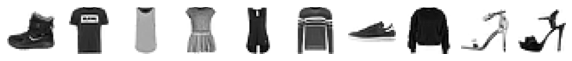

In [18]:
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

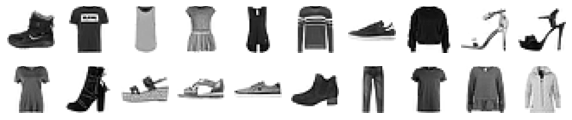

In [42]:
# 연습문제: 처음 input 데이터에서 처음 20개의 이미지 데이터를 선택하여 (2행 10열) 형태의 이미지로 그려보시오
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 10, figsize=(10,2))
axs_flat = axs.flat
for i in range(20):
    axs_flat[i].imshow(train_input[i], cmap='gray_r')
    axs_flat[i].axis('off')
plt.show()
# fig, axs = plt.subplots(2, 10, figsize=(10,2))
# for ax, image in zip(axs.flat, train_input):
#     ax.imshow(image, cmap='gray_r')
#     ax.axis('off')
# plt.show()

In [43]:
# list comprehension을 이용하여 처음 10개 샘플의 타깃값을 리스트로 만든 후 출력

print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [44]:
# 넘파이 unique() 함수로 레이블당 샘플 개수 확인

import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [45]:
# 0~1 사이의 값으로 정규화한 후
# reshape() 메서드로 2차원 배열인 각 샘플을 1차원 배열로 펼침

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [47]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # 반복횟수는 5번으로 지정

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8312999999999999


In [48]:
import tensorflow as tf

In [49]:
from tensorflow import keras

In [50]:
# 모델 평가(검증)을 위해 훈련세트에서 검증 세트(validation set)를 분리

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [51]:
# 훈련세트의 크기 확인

print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [52]:
# 검증세트의 크기 확인

print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [53]:
# 첫 번째 신경망 구성
# 케라스의 Dense 클래스를 이용한 완전연결층(fully connected layer) 구성

# 10: 뉴런(유닛) 개수
# activation='softmax': 뉴런의 출력에 적용할 함수
# input_shape=(874,) : 입력의 크기

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [54]:
# 모델 구성
# 케라스의 Sequential 클래스 사용

model = keras.Sequential(dense)

In [55]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [56]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8555


In [57]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 4ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]